In [1]:
!git clone https://github.com/hughplay/DFNet.git
%cd DFNet/

Cloning into 'DFNet'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 84 (delta 15), reused 6 (delta 6), pack-reused 55
Unpacking objects: 100% (84/84), 8.44 MiB | 10.29 MiB/s, done.
/content/DFNet


In [2]:
!wget --no-check-certificate https://zenodo.org/record/4992308/files/model_celeba.pth -O model/model_celeba.pth
!wget --no-check-certificate https://zenodo.org/record/4992308/files/model_places2.pth -O model/model_places2.pth
!wget --no-check-certificate https://zenodo.org/record/4992308/files/model_places2_2021.pth -O model/model_places2_2021.pth

--2023-07-16 02:47:55--  https://zenodo.org/record/4992308/files/model_celeba.pth
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131611811 (126M) [application/octet-stream]
Saving to: ‘model/model_celeba.pth’

model/model_celeba. 100%[===================>] 125.51M  9.41MB/s    in 63s     

2023-07-16 02:48:59 (2.01 MB/s) - ‘model/model_celeba.pth’ saved [131611811/131611811]

--2023-07-16 02:49:00--  https://zenodo.org/record/4992308/files/model_places2.pth
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131611811 (126M) [application/octet-stream]
Saving to: ‘model/model_places2.pth’

model/model_places2 100%[===================>] 125.51M   433KB/s    in 5m 9s   

2023-07-16 02:54:11 (416 KB/s) - ‘model/model_places2.pth’ saved

In [5]:
from testeo import Tester
from PIL import Image
import argparse

In [6]:
parser = argparse.ArgumentParser()
parser.add_argument(
    '-m', '--model', default='./model/model_places2.pth',
    help='Select a checkpoint.')
parser.add_argument(
    '-i', '--input_size', default=0, type=int,
    help='Batch size for testing.')
parser.add_argument(
    '-b', '--batch_size', default=8, type=int,
    help='Batch size for testing.')
parser.add_argument(
    '--img', default='./samples/places2/img',
    help='Image or Image folder.')
parser.add_argument(
    '--mask', default='./samples/places2/mask',
    help='Mask or Mask folder.')
parser.add_argument('--output', default='./output/places2',
    help='Output dir')
parser.add_argument(
    '--merge', action='store_true',
    help='Whether merge input and results for better viewing.')
args = parser.parse_args(args=['--merge'])
args

Namespace(model='./model/model_places2.pth', input_size=0, batch_size=8, img='./samples/places2/img', mask='./samples/places2/mask', output='./output/places2', merge=True)

## Inpainting multiple images

Using gpu.
Model ./model/model_places2.pth loaded.
# Inpainting...
Input size: (512, 512)


Inpainting finished.
# Preparing input images...
Total images: 4 4


4it [00:00, 35.43it/s]


# Merging...
Total images: [4, 4, 4, 4, 4]
Row: 1
Column: 5


4it [00:00, 10.22it/s]


Merging finished.


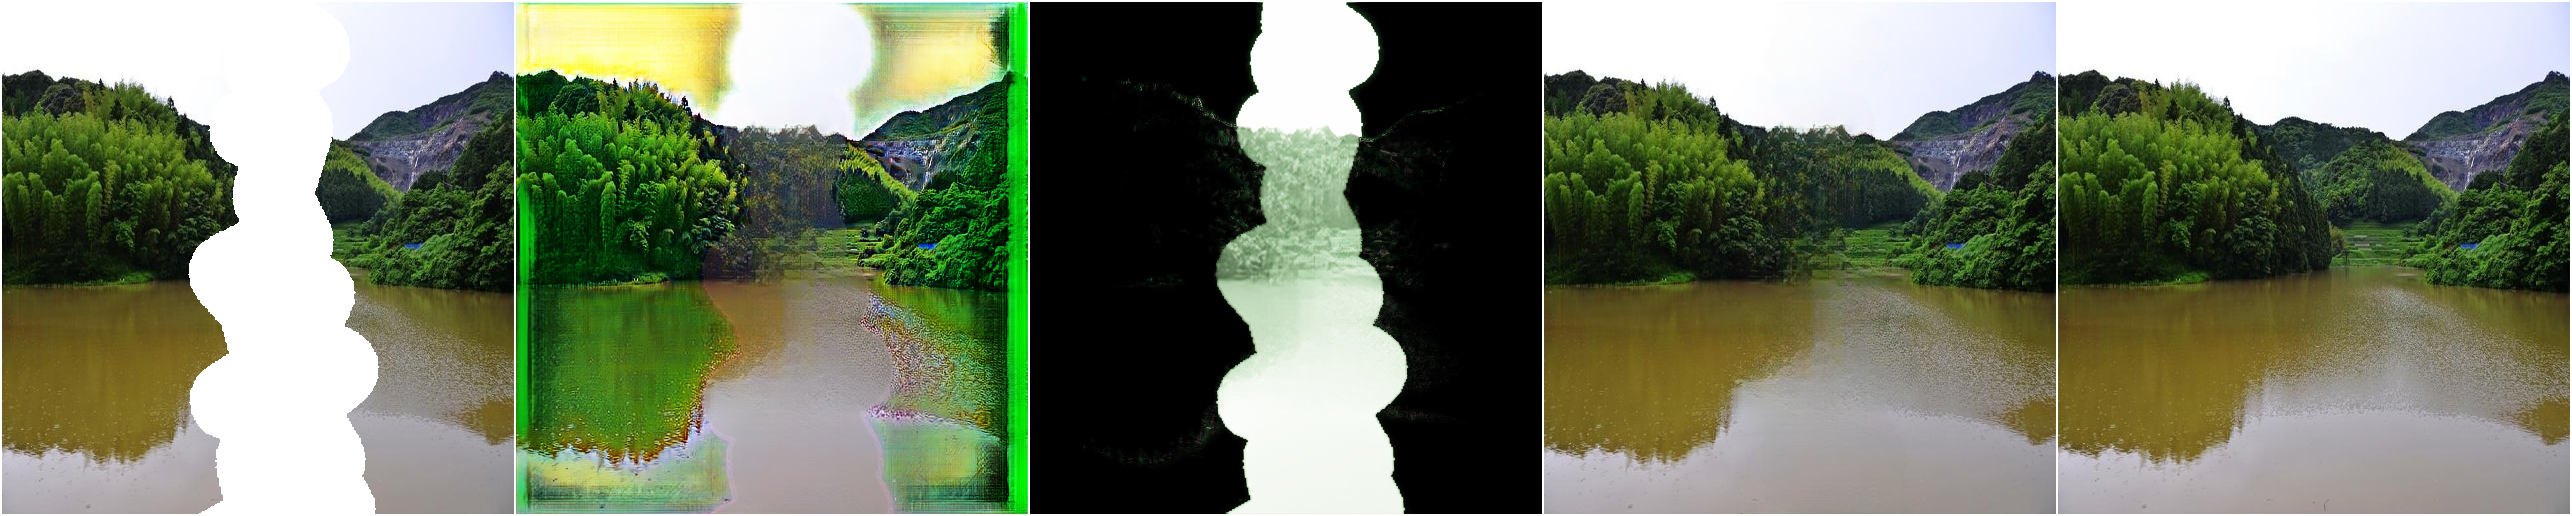

In [7]:
tester = Tester(args.model, args.input_size, args.batch_size)
tester.inpaint(args.output, args.img, args.mask, merge_result=args.merge)
Image.open('output/places2/merge/merge_0000.png')

Using gpu.
Model model/model_places2_2021.pth loaded.
# Inpainting...
Input size: (512, 512)


Inpainting finished.
# Preparing input images...
Total images: 4 4


4it [00:00, 34.28it/s]


# Merging...
Total images: [4, 4, 4, 4, 4]
Row: 1
Column: 5


4it [00:00,  9.98it/s]


Merging finished.


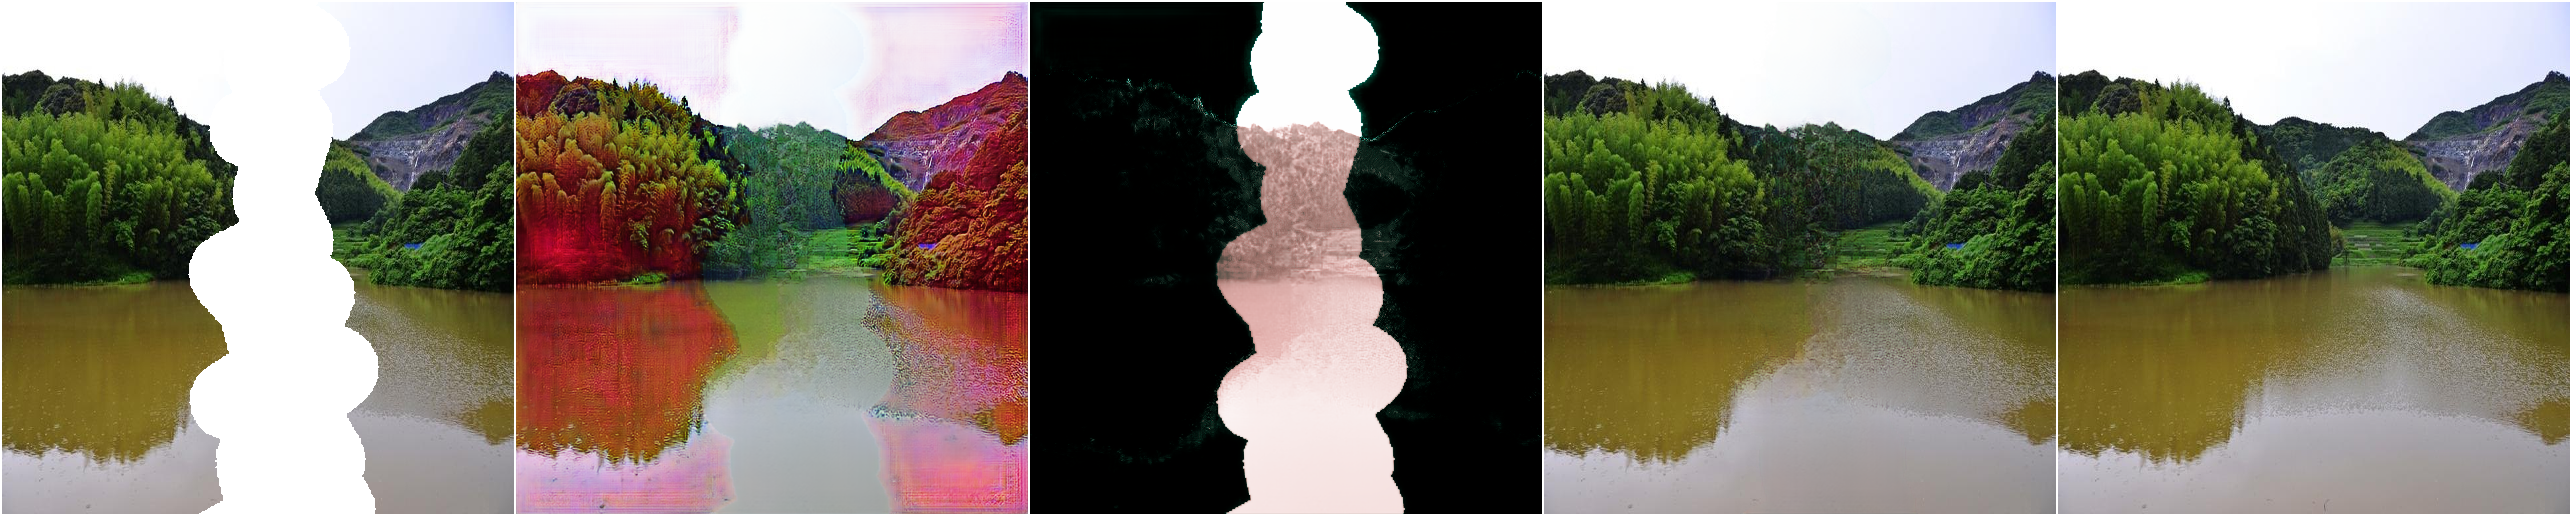

In [7]:
# Trained with https://github.com/deepcodebase/inpaint
args.model = 'model/model_places2_2021.pth'
tester = Tester(args.model, args.input_size, args.batch_size)
tester.inpaint(args.output, args.img, args.mask, merge_result=args.merge)
Image.open('output/places2/merge/merge_0000.png')

Using gpu.


4it [00:00, 132.53it/s]
0it [00:00, ?it/s]

Model model/model_celeba.pth loaded.
# Inpainting...
Input size: (256, 256)
Inpainting finished.
# Preparing input images...
Total images: 4 4
# Merging...
Total images: [4, 4, 4, 4, 4]
Row: 1
Column: 5


4it [00:00, 49.21it/s]


Merging finished.


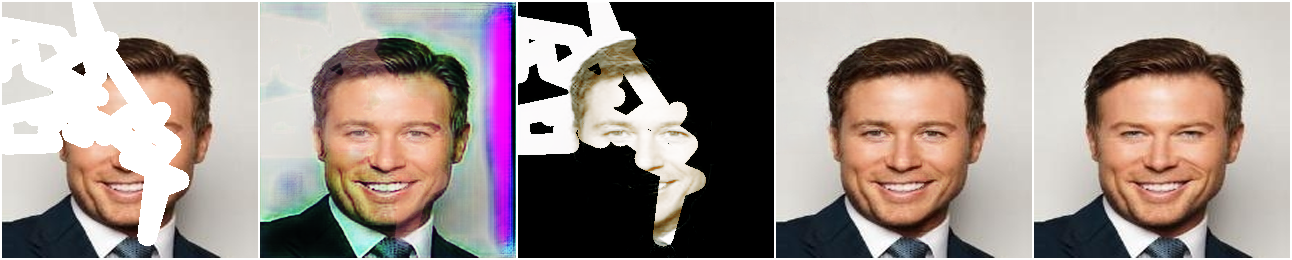

In [ ]:
args.model = 'model/model_celeba.pth'
tester = Tester(args.model, args.input_size, args.batch_size)
tester.inpaint('output/celeba', 'samples/celeba/img', 'samples/celeba/mask', merge_result=True)
Image.open('output/celeba/merge/merge_0000.png')

## Inpainting one single image

Using gpu.
Model model/model_places2_2021.pth loaded.
# Inpainting...
Input size: (512, 512)


Inpainting finished.
# Preparing input images...
Total images: 1 1


1it [00:00, 30.05it/s]


# Merging...
Total images: [1, 1, 1, 1, 1]
Row: 1
Column: 5


1it [00:00, 10.94it/s]


Merging finished.


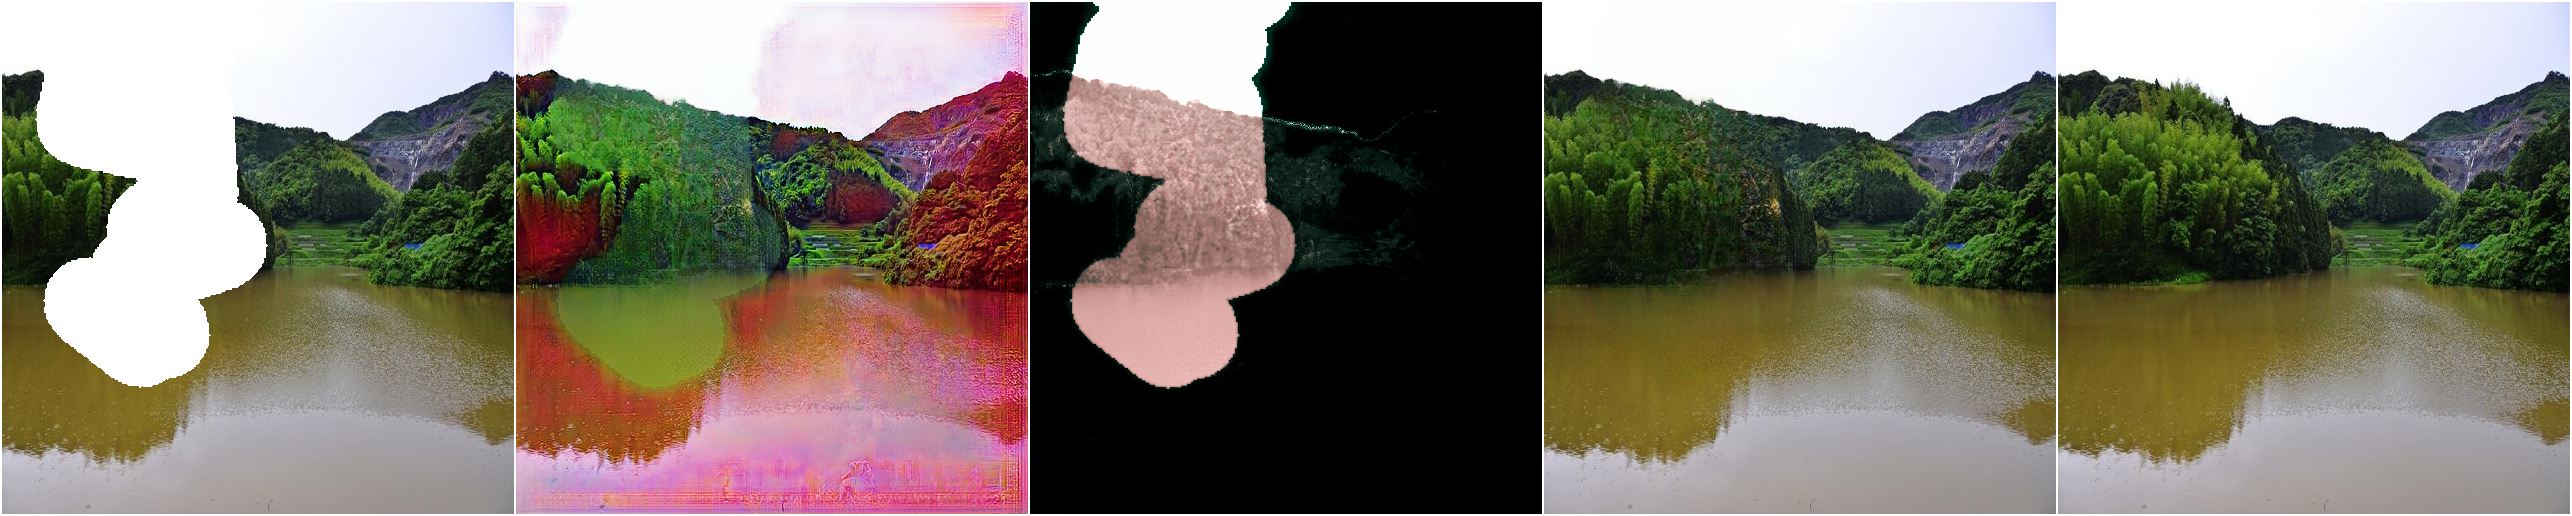

In [8]:
args.model = 'model/model_places2_2021.pth'
tester = Tester(args.model, args.input_size, args.batch_size)
tester.inpaint('output/custom', 'samples/places2/img/img_01.png', 'samples/places2/mask/mask_02.png', merge_result=True)
Image.open('output/custom/merge/merge_0000.png')